<a href="https://colab.research.google.com/github/deemanth-05/Corona_data/blob/main/CyberBullyingImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists
time: 138 ms (started: 2022-07-23 04:24:46 +00:00)


In [ ]:
!pip install IPython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 4.05 s (started: 2022-07-23 03:54:17 +00:00)


In [ ]:
                    # PREPROCESSING

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

datadir = '/content/images'
categories = ['Red','Green','Blue']

                    # LABEL ENCODING

for category in categories:
  class_num = categories.index(category)

                    # PATH

  path = os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)

                  # RESIZE

    img_resized = resize(img_array,(150,150,3))

                  # FLATTEN

    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


time: 3.4 ms (started: 2022-07-23 04:19:31 +00:00)


In [ ]:
len(flat_data[0])

67500

time: 10.7 ms (started: 2022-07-22 15:36:15 +00:00)


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 3.77 ms (started: 2022-07-22 15:37:07 +00:00)


<BarContainer object of 2 artists>

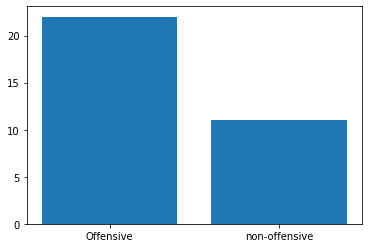

time: 269 ms (started: 2022-07-22 15:37:21 +00:00)


In [ ]:
unique,count = np.unique(target,return_counts=True)
plt.bar(categories,count)

In [ ]:
                    # TRAINING AND TESTING

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=100)

time: 19.4 ms (started: 2022-07-22 15:37:32 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 7.76 s (started: 2022-07-22 15:37:51 +00:00)


In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

time: 103 ms (started: 2022-07-22 15:38:08 +00:00)


In [ ]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0])

time: 16 ms (started: 2022-07-22 15:38:18 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

time: 2.03 ms (started: 2022-07-22 15:38:29 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.7

time: 27.5 ms (started: 2022-07-22 15:38:38 +00:00)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

time: 443 ms (started: 2022-07-22 15:51:33 +00:00)


In [ ]:
model.score(x_test,y_test)

0.7

time: 49.7 ms (started: 2022-07-22 15:52:21 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[7, 3],
       [0, 0]])

time: 14.5 ms (started: 2022-07-22 15:38:45 +00:00)


In [ ]:
 print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.00      0.00      0.00         0

    accuracy                           0.70        10
   macro avg       0.50      0.35      0.41        10
weighted avg       1.00      0.70      0.82        10

time: 15.2 ms (started: 2022-07-22 15:38:57 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
                    # SAVING THE MODEL

import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 42.5 ms (started: 2022-07-22 15:39:08 +00:00)


In [ ]:
model = pickle.load(open('img_model.p','rb'))

time: 19.2 ms (started: 2022-07-22 15:39:17 +00:00)


Enter Your URLhttps://thumbs.dreamstime.com/b/two-angry-executives-fighting-hitting-folders-office-two-angry-executives-fighting-office-115012796.jpg
(533, 800, 3)
PREDICTED OUTPUT: Offensive


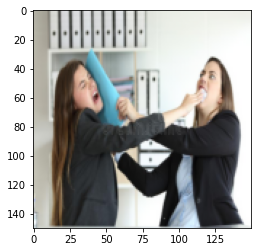

time: 26.8 s (started: 2022-07-22 16:10:01 +00:00)


In [ ]:
                    # TESTING

flat_data = []
url = input('Enter Your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')